<a href="https://colab.research.google.com/github/DyatlovaA/cv-tf/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D0%A04_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка датасета CelebA

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time
import os
import numpy as np

# Загрузка датасета CelebA
!gdown --id 1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684 -O celebA.zip
!unzip -q celebA.zip -d data
!mkdir -p celebA
!mv data/img_align_celeba celebA/
!rm -rf data

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684
From (redirected): https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684&confirm=t&uuid=c52a3c58-a9fc-4579-ab76-64f3ee041509
To: /content/celebA.zip
100% 1.44G/1.44G [07:19<00:00, 3.28MB/s]


#Подготовка данных

In [ ]:
# Параметры
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 64  # Увеличенный размер батча
BUFFER_SIZE = 1000
EPOCHS = 50      # Увеличено до 50 эпох
noise_dim = 100

# Функция загрузки и аугментации
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT+10, IMG_WIDTH+10])
    img = tf.image.random_crop(img, [IMG_HEIGHT, IMG_WIDTH, 3])
    img = tf.image.random_flip_left_right(img)
    img = (img - 127.5) / 127.5  # Нормализация [-1, 1]
    return img

# Проверка существования папки
if not os.path.exists('celebA/img_align_celeba'):
    raise FileNotFoundError("Папка с данными не найдена!")

# Создание Dataset
dataset = tf.data.Dataset.list_files('celebA/img_align_celeba/*.jpg', shuffle=True)
dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

#Архитектура DCGAN

Генератор с увеличенной ёмкостью/Дискриминатор

In [ ]:
def make_generator():
    model = tf.keras.Sequential([
        layers.Dense(8*8*512, use_bias=False, input_shape=(noise_dim,)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Reshape((8, 8, 512)),

        layers.Conv2DTranspose(256, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2DTranspose(3, (5,5), strides=(1,1), padding='same', activation='tanh')
    ])
    return model

def make_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[64,64,3]),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Conv2D(256, (5,5), strides=(2,2), padding='same'),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

#Обучение с визуализацией

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Начало обучения...


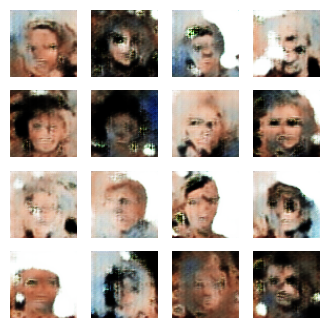

Эпоха 5, G_loss: 3.4131, D_loss: 0.4243
Время: 283.92 сек


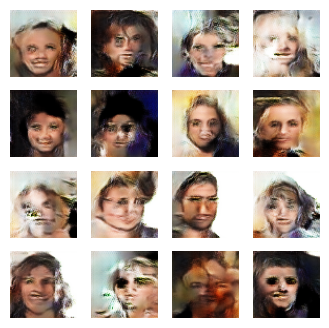

Эпоха 10, G_loss: 2.3970, D_loss: 0.6698
Время: 284.23 сек


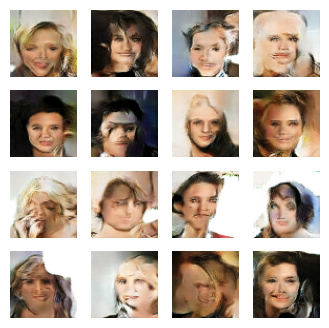

Эпоха 15, G_loss: 1.8047, D_loss: 0.8698
Время: 284.40 сек


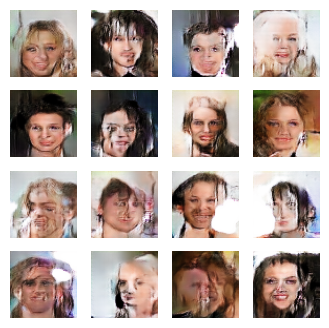

Эпоха 20, G_loss: 1.6902, D_loss: 0.9028
Время: 229.23 сек


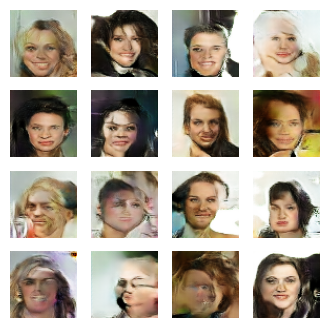

Эпоха 25, G_loss: 1.7387, D_loss: 0.8527
Время: 273.98 сек


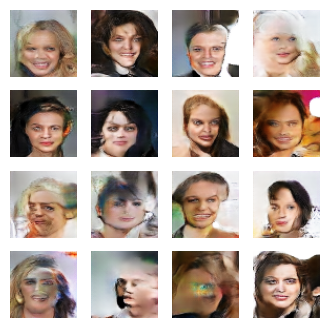

Эпоха 30, G_loss: 1.7715, D_loss: 0.8345
Время: 277.08 сек


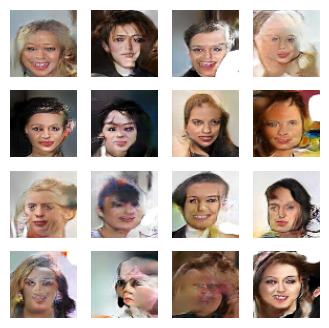

Эпоха 35, G_loss: 1.8249, D_loss: 0.8063
Время: 276.98 сек


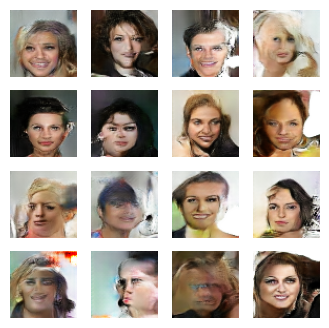

Эпоха 40, G_loss: 1.8140, D_loss: 0.8151
Время: 228.93 сек


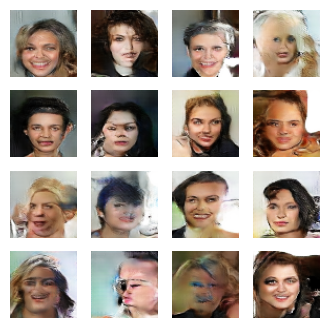

Эпоха 45, G_loss: 1.7935, D_loss: 0.8397
Время: 318.71 сек


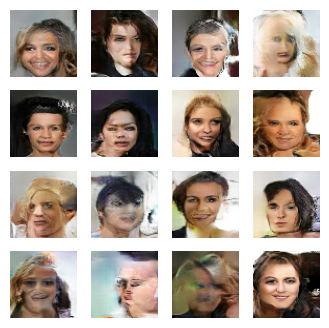

Эпоха 50, G_loss: 1.6953, D_loss: 0.8901
Время: 251.98 сек


In [ ]:
# Инициализация
generator = make_generator()
discriminator = make_discriminator()

# Loss и оптимизаторы
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Трекинг метрик
generator_losses = []
discriminator_losses = []

# Фиксированный шум для демонстрации
fixed_noise = tf.random.normal([16, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4,4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        epoch_gen_loss = []
        epoch_disc_loss = []

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            epoch_gen_loss.append(gen_loss)
            epoch_disc_loss.append(disc_loss)

        generator_losses.append(tf.reduce_mean(epoch_gen_loss))
        discriminator_losses.append(tf.reduce_mean(epoch_disc_loss))

        if (epoch + 1) % 5 == 0:
            generate_and_save_images(generator, epoch + 1, fixed_noise)
            print(f"Эпоха {epoch+1}, G_loss: {generator_losses[-1]:.4f}, D_loss: {discriminator_losses[-1]:.4f}")
            print(f"Время: {time.time() - start:.2f} сек")

# Запуск обучения
print("Начало обучения...")
train(dataset, EPOCHS)

#Анализ результатов

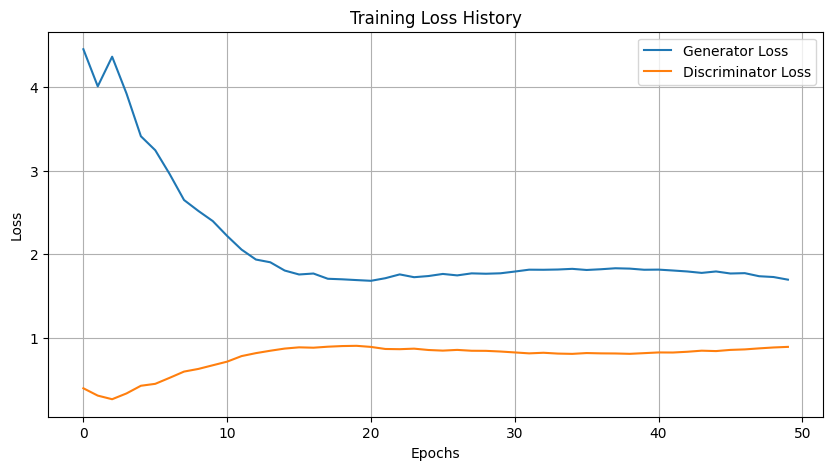

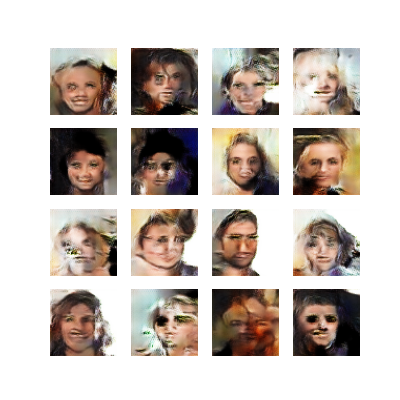

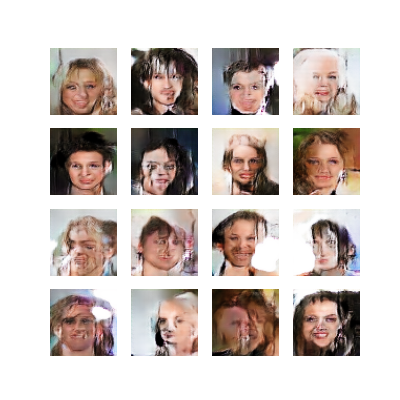

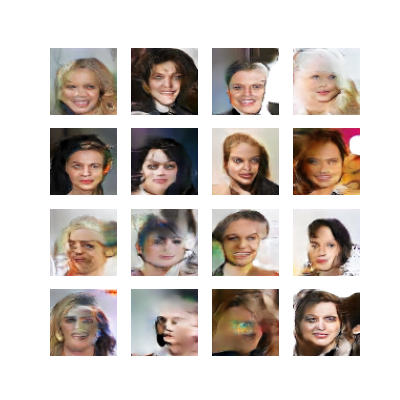

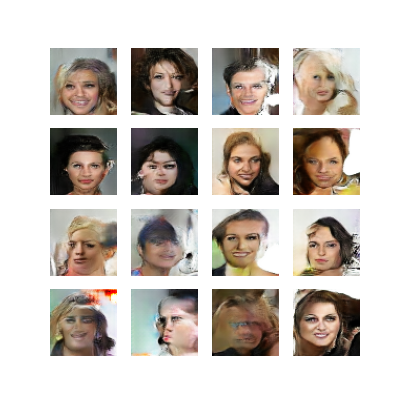

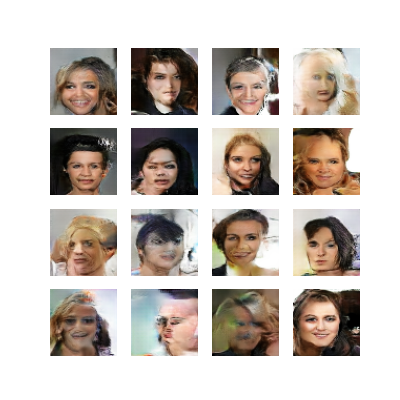

In [ ]:
# Графики потерь
plt.figure(figsize=(10,5))
plt.plot(generator_losses, label='Generator Loss')
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Просмотр примеров
from IPython.display import Image, display
for epoch in range(0, EPOCHS+1, 10):
    try:
        display(Image(filename=f'image_at_epoch_{epoch:04d}.png'))
    except:
        continue